In [1]:
!rm -rf data/
!rm -rf data.z*
!drm -rf mlutils.p*
!mkdir -p data/
!cd data/
!wget https://github.com/marcoteran/artificialintelligence/raw/master/notebooks/01_machinelearnig/data/wine.data.txt -P data/
!ls

with open("/content/data/wine.data.txt") as f:
  data = f.readlines()

import pandas as pd
winedata_df=pd.read_csv ("data/wine.data.txt")

/bin/bash: drm: command not found
--2021-10-19 23:14:12--  https://github.com/marcoteran/artificialintelligence/raw/master/notebooks/01_machinelearnig/data/wine.data.txt
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/marcoteran/artificialintelligence/master/notebooks/01_machinelearnig/data/wine.data.txt [following]
--2021-10-19 23:14:12--  https://raw.githubusercontent.com/marcoteran/artificialintelligence/master/notebooks/01_machinelearnig/data/wine.data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10925 (11K) [text/plain]
Saving to: ‘data/wine.data.txt’

wine.data.txt       100%[======

In [2]:
winedata_df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine_labels=winedata_df['Class']

In [4]:
wine_labels

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

In [5]:
winedata_df.drop('Class',axis=1,inplace=True)

In [6]:
winedata_df.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
import matplotlib as plt
import numpy as np
import seaborn as sb

In [8]:
wineindex=np.array(winedata_df.keys())

In [9]:
labelnumber=len(wineindex)

In [10]:
labelnumber

13

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec

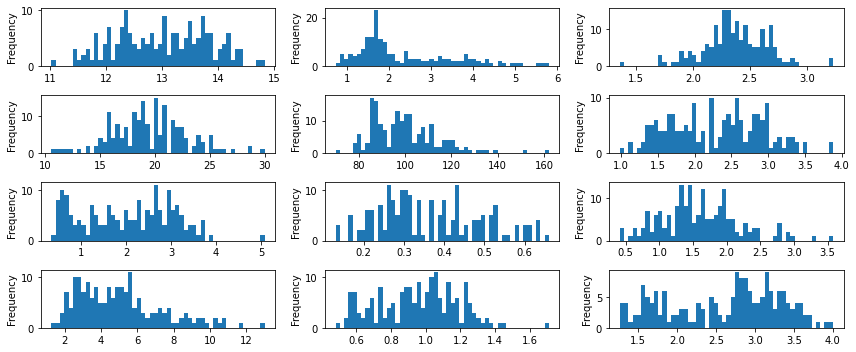

In [12]:
fig =plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(4,3)
index=0
for g in gs:
  ax = fig.add_subplot(g)
  if index<13:
    ax= winedata_df[wineindex[index]].plot.hist(bins=50)
    index+=1
    fig.tight_layout()

In [13]:
x= np.array(winedata_df)
y=np.array(wine_labels)

In [14]:
winedata_df


,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [15]:
import matplotlib.pyplot as plt
import seaborn as sb

dataFrame = pd.read_csv("data/wine.data.txt", index_col=3)
labelsFrame = dataFrame.iloc[:, 0]
valuesFrame = dataFrame.iloc[:, 1:]
labels = labelsFrame.values
values = valuesFrame.values

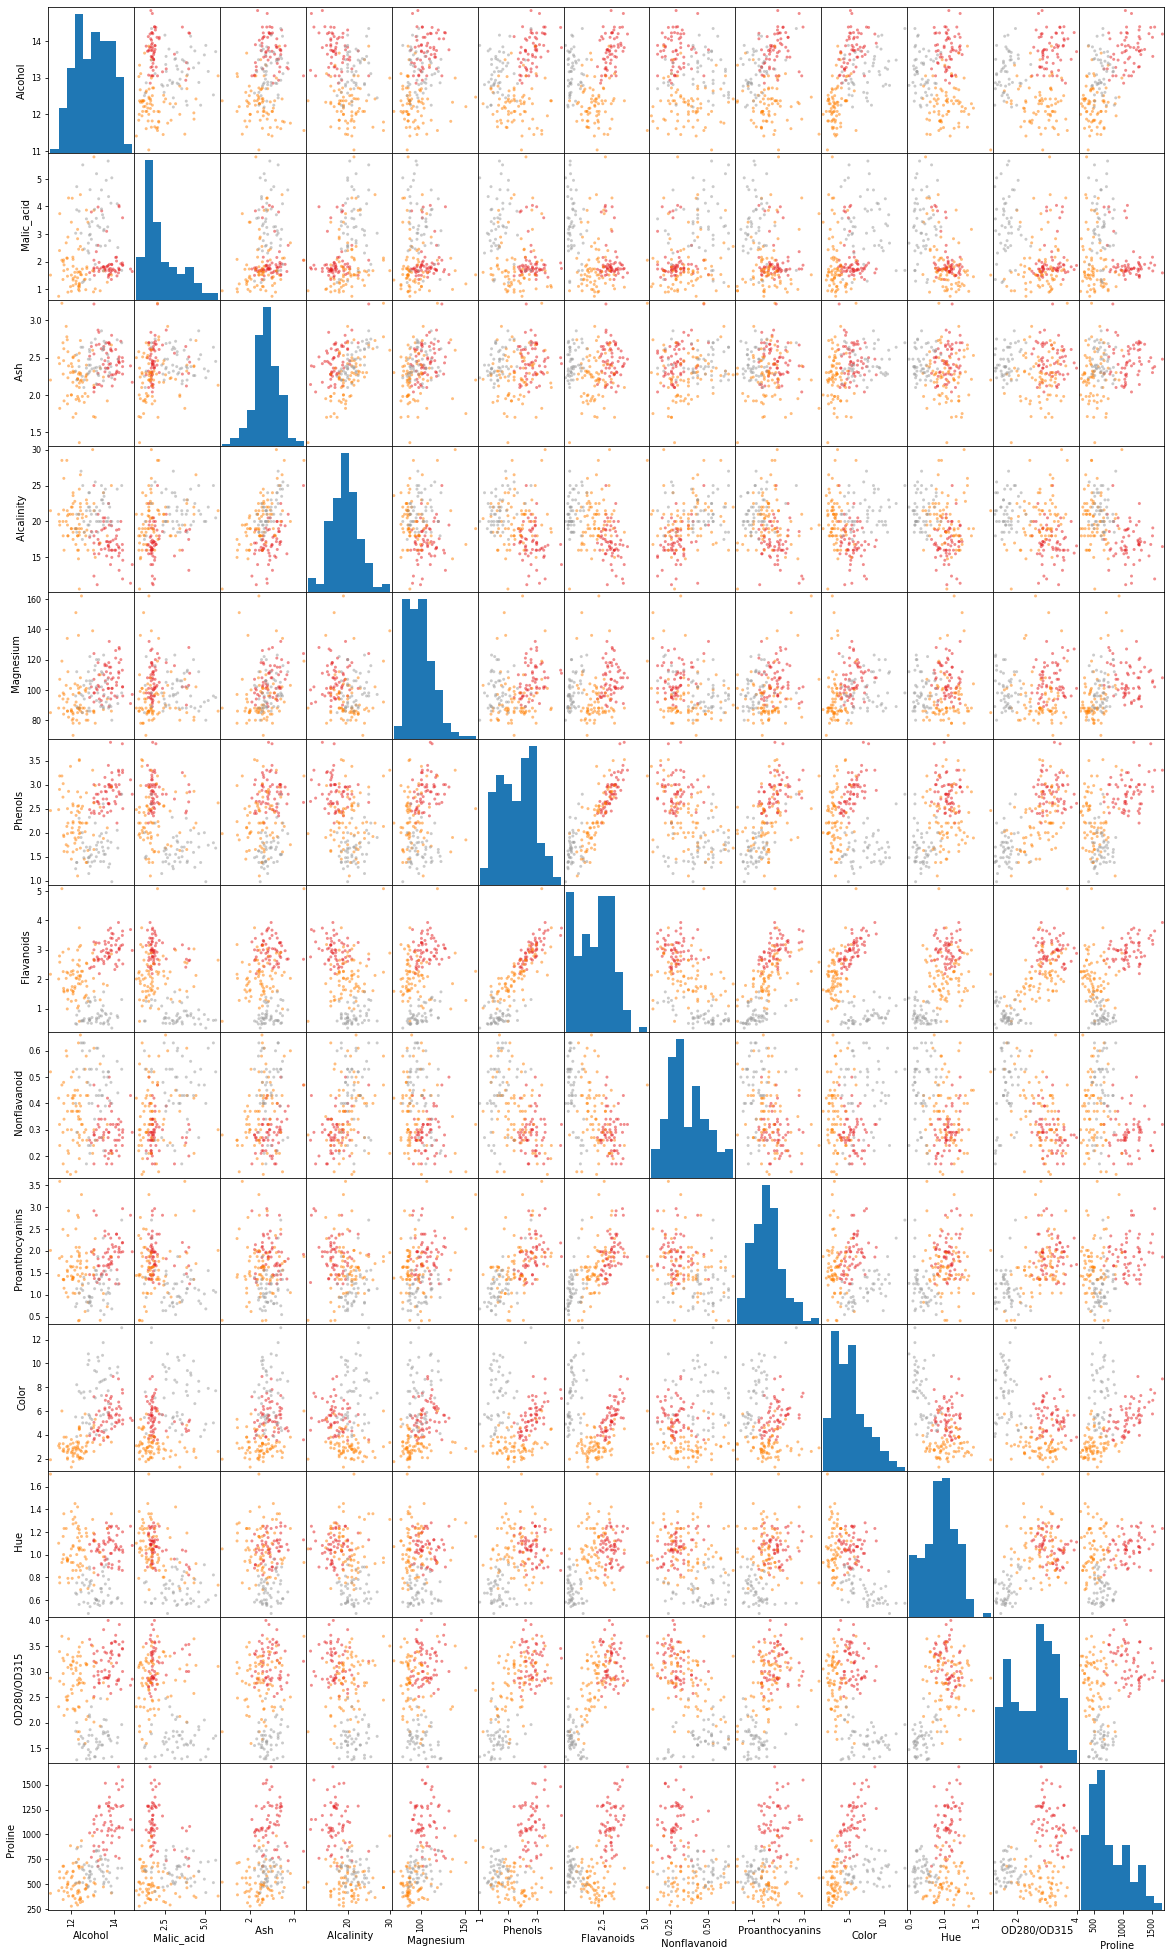

In [16]:
from matplotlib import cm 
cmap = cm.get_cmap('Set1')

pd.plotting.scatter_matrix(winedata_df, c=wine_labels,cmap=cmap, figsize=(20,35));

In [17]:
x=np.array(winedata_df)
y=np.array(wine_labels)

In [18]:
x_FP=x[:,[6,12]]

X_AMA=x[:,[1,3]]

In [19]:
from sklearn.linear_model import LogisticRegression

In [42]:
classifier_FP=LogisticRegression(multi_class="multinomial", solver= 'lbfgs', max_iter=300)
classifier_AMA=LogisticRegression(multi_class="multinomial", solver= 'lbfgs', max_iter=300)

In [45]:
classifier_FP.fit(x_FP, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
classifier_AMA.fit(X_AMA, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
predictions_FP=classifier_FP.predict(x_FP)

In [47]:
print('Valores reales: {}'.format(y))
print('Valores reales: {}'.format(predictions_FP))

Valores reales: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Valores reales: [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 2 2 2 2 2 2 3 3 3 2 2 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 2 2 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [51]:
predictions_AMA=classifier_AMA.predict(X_AMA)

In [52]:
print('Valores reales: {}'.format(y))
print('Valores reales: {}'.format(predictions_AMA))

Valores reales: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Valores reales: [1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 3 1 2 2 2 1 1 2 1 2 2 1 2 2 2 1
 2 1 1 1 3 1 1 1 3 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 2 1 2 1 1 2 2 2 2
 2 1 1 1 1 3 2 2 2 3 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 3
 2 2 2 2 2 2 2 1 3 2 2 3 3 3 2 2 2 2 3 2 3 2 3 2 1 3 3 3 3 2 2 3 3 3 3 3 3
 3 3 3 2 2 1 2 3 3 3 2 2 3 3 3 3 2 3 3 3 2 3 1 2 2 3 3 3 2 3]


In [64]:
def plot_decision_region(X, pred_fun):
  min_x = np.min(X[:,0])
  max_x = np.min(X[:,0])
  min_y = np.min(X[:,1])
  max_y = np.min(X[:,1])
  min_x = min_x - (max_x - min_x) * 0.05
  max_x = max_x + (max_x - min_x) * 0.05
  min_y = min_y - (max_y - min_y) * 0.05
  max_y = max_y + (max_y - min_y) * 0.05
  x_vals = np.linspace(min_x, max_x, 100)
  y_vals = np.linspace(min_y, max_y, 100)
  XX, YY = np.meshgrid(x_vals, y_vals)
  grid_r, grid_c = XX.shape
  ZZ = np.zeros((grid_r, grid_c))
  for i in range(grid_r):
   for j in range(grid_c):
    ZZ[i,j] = pred_fun(XX[i,j], YY[i,j])
  pl.contourf(XX, YY, ZZ, 100, cmap=pl.cm.coolwarm, vmin=-1,vmax=2)
  pl.colorbar
  pl.xlabel("x")
  pl.ylabel("y")



In [58]:
def gen_pred_fun(clf):
  def pred_fun(x1,x2):
    x=np.array([[x1,x2]])
    return clf.predict(x)[0]
  return pred_fun

In [59]:
def plot_data(X,y):
  y_unique=np.unique(y)
  colors = pl.cm.rainbow(np.linspace(0.0,1.0,y_unique.size))
  for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    pl.scatter(this_X[:,0],this_X[:,1],c=color.reshape(1,-1),alpha=0.5,edgecolor='k',label='Class %s'% this_y)
    pl.legend(loc="best")
    pl.title("Data")

In [62]:
import pylab as pl

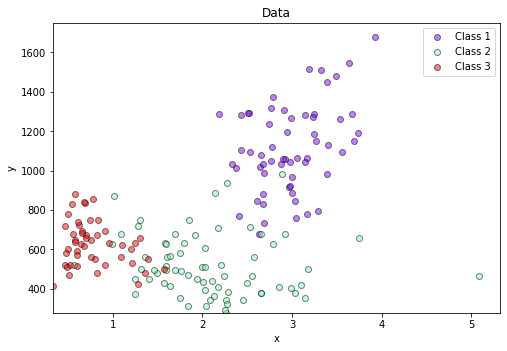

In [65]:
pl.figure(figsize = (8,16/3))
plot_decision_region(x_FP,gen_pred_fun(classifier_FP))
plot_data(x_FP,y)

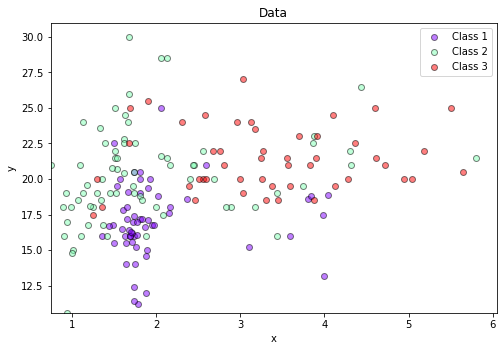

In [66]:
pl.figure(figsize = (8,16/3))
plot_decision_region(X_AMA,gen_pred_fun(classifier_AMA))
plot_data(X_AMA,y)